In [29]:
import numpy as np
import pandas as pd
#For Confusion Matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

In [30]:
def aggregate_conf_mat(mat1, mat2, mat3, mat4, name):
    aggr1 = np.add(mat1, mat2)
    aggr2 = np.add(mat3, mat4)
    aggr = np.add(aggr1, aggr2)
    print(aggr.sum(axis=1))
#     aggr = aggr/aggr.sum(axis=1)
    df_cm = pd.DataFrame(aggr, index = ['NF', 'MF', 'SF'],
                  columns = ["NF", "MF", "SF"])
    sns.set(font_scale=1.9)
    plt.figure(figsize = (6,5))
    ax = sns.heatmap(df_cm, annot=True, fmt='g', cmap=ListedColormap(['gainsboro']), cbar=False)
#     ax.set_visible(False)
    ax.tick_params(left=True, right=False, top=True,labeltop=True, labelbottom=False, width=2, grid_marker=True)
    plt.savefig(name, dpi=300)
    plt.show()
    

VGG Confusion Matrix
[[4132]
 [ 770]
 [ 809]]


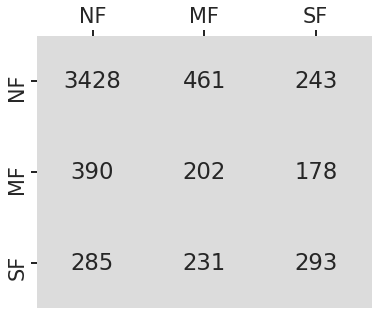

AlexNet Confusion Matrix
[[4132]
 [ 770]
 [ 809]]


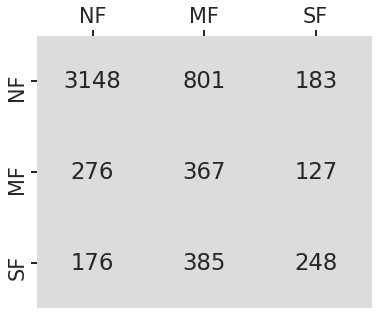

ResNet Confusion Matrix
[[4132]
 [ 770]
 [ 809]]


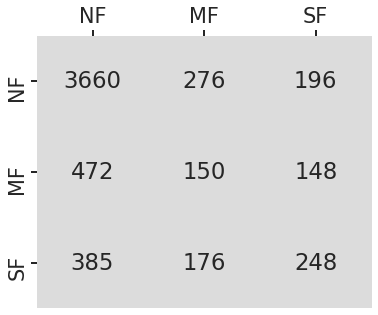

In [31]:
#VGG16 Confusion Matrix
vgg_fold1_cmat = np.matrix('763 161 64; 60 64 38; 55 88 74')
vgg_fold2_cmat = np.matrix('857 129 78; 100 46 46; 61 47 41')
vgg_fold3_cmat = np.matrix('943 92 42; 98 35 50; 82 36 82')
vgg_fold4_cmat = np.matrix('865 79 59; 132 57 44; 87 60 96')

print("VGG Confusion Matrix")
aggregate_conf_mat(vgg_fold1_cmat, vgg_fold2_cmat, vgg_fold3_cmat, vgg_fold4_cmat, 'vgg_conf.pdf')

#AlexNet Confusion Matrix
alex_fold1_cmat = np.matrix('718 212 58; 52 83 27; 41 127 49')
alex_fold2_cmat = np.matrix('883 147 34; 80 98 14; 46 82 21')
alex_fold3_cmat = np.matrix('705 335 37; 25 110 48; 22 93 85')
alex_fold4_cmat = np.matrix('842 107 54; 119 76 38; 67 83 93')

print("AlexNet Confusion Matrix")
aggregate_conf_mat(alex_fold1_cmat, alex_fold2_cmat, alex_fold3_cmat, alex_fold4_cmat, 'alex_conf.pdf')


#ResNet Confusion Matrix
#VGG16 Confusion Matrix
res_fold1_cmat = np.matrix('847 105 36; 93 43 26; 82 73 62')
res_fold2_cmat = np.matrix('933 58 73; 118 35 39; 86 20 43')
res_fold3_cmat = np.matrix('985 64 28; 128 28 27; 123 36 41')
res_fold4_cmat = np.matrix('895 49 59; 133 44 56; 94 47 102')

print("ResNet Confusion Matrix")
aggregate_conf_mat(res_fold1_cmat, res_fold2_cmat, res_fold3_cmat, res_fold4_cmat, 'res_conf.pdf')

In [ ]:
"""conf = np.matrix('763 161 64; 60 64 38; 55 88 74').astype(np.float)
conf +=conf
conf1 =conf/conf.sum()
print(conf1.sum())
# conf = [[763, 161, 6], [60, 64, 38], [55, 88, 74]]
df_cm = pd.DataFrame(conf1, index = ['True 0', 'True 1', 'True 2'],
                  columns = ["Pred 0", "Pred 1", "Pred 2"])
plt.figure(figsize = (10,7))
ax = sns.heatmap(df_cm, annot=True, vmax=0.6, vmin=0.00001)
ax.tick_params(right=True, labeltop=True, labelbottom=False)
plt.show()"""

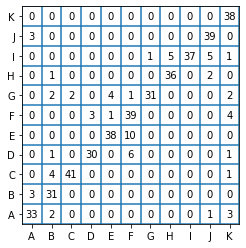

In [18]:
import numpy as np
import matplotlib.pyplot as plt

conf_arr = np.array([[33,2,0,0,0,0,0,0,0,1,3], 
            [3,31,0,0,0,0,0,0,0,0,0], 
            [0,4,41,0,0,0,0,0,0,0,1], 
            [0,1,0,30,0,6,0,0,0,0,1], 
            [0,0,0,0,38,10,0,0,0,0,0], 
            [0,0,0,3,1,39,0,0,0,0,4], 
            [0,2,2,0,4,1,31,0,0,0,2],
            [0,1,0,0,0,0,0,36,0,2,0], 
            [0,0,0,0,0,0,1,5,37,5,1], 
            [3,0,0,0,0,0,0,0,0,39,0], 
            [0,0,0,0,0,0,0,0,0,0,38]])
height, width = conf_arr.shape

fig = plt.figure('confusion matrix')
ax = fig.add_subplot(111, aspect='equal')
for x in range(width):
    for y in range(height):
        ax.annotate(str(conf_arr[x][y]), xy=(y, x), ha='center', va='center')

offset = .5    
ax.set_xlim(-offset, width - offset)
ax.set_ylim(-offset, height - offset)

ax.hlines(y=np.arange(height+1)- offset, xmin=-offset, xmax=width-offset)
ax.vlines(x=np.arange(width+1) - offset, ymin=-offset, ymax=height-offset)

alphabet = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
plt.xticks(range(width), alphabet[:width])
plt.yticks(range(height), alphabet[:height])
plt.show()